In [37]:
from scripts.BZ2Reader import bz2reader
from glob import glob
import os, re, pickle
from pprint import pprint
from time import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.feature_extraction.text import HashingVectorizer

%matplotlib inline

In [17]:
# Args
data_dir = "../data"
num_posts = 100
hash_vect = "models/hash_vect.pk"

In [4]:
def data_processing(bz2files, max_lines=-1):
    for bz2file in  bz2files:
        bzr = bz2reader(fname=bz2file,
                        keys=['body'],
                        max_lines=max_lines)
        for data in bzr.select_keys():
            yield data['body']

In [18]:
data_path = os.path.join(data_dir, '*.bz2')         # arg var needs fixed
bzfile = glob(data_path)
d = data_processing(bzfile, num_posts)          # arg var needs fixed
print('loading data...', end=' ')
data = [l for l in d]
print('done')

loading data... done


In [19]:
# ### Data processing steps
# %%
# Remove punctuation
print('processing data...', end=' ')
data = [re.sub('[,\\.!?]', '', x) for x in data]
# Convert the titles to lowercase
data = [x.lower() for x in data]
# Remove post with less than 10 words
data = [x for x in data if len(x.split(' '))>10]
print('done')
# display some data
print('first 4 posts:')
pprint(data[:3])
print('\n')



processing data... done
first 4 posts:
['i was thinking 170k max but if we get another player off the books (gibson) '
 'there would be a small bit more room to maneuver',
 'a baton is more likely to kill someone than a taser',
 'cut him a break he probably just finished watching training day ']




In [20]:
print('loading hash vectorizer...', end=' ')
hash_vectorizer = pickle.load(open(hash_vect, 'rb'))
hash_data = hash_vectorizer.transform(data)
print('done')

loading hash vectorizer... done


In [21]:
hash_data.shape

(43, 40000)

In [14]:
data[15]

"you still need heatsinks to get heat from the components into the oil and you need some way to keep the oil circulating around what were you planning on putting on the other side of that tec\n\ni'd say just go with normal water cooling water is better for cooling and the tubing gets it to and from the components very efficiently you can still go lower than ambient if you want you can put a chiller in the water reservoir or make a dual-loop system where you have one cold loop that goes by your components a heat exchanger then the hot loop which goes to the radiator"

In [25]:
x = StandardScaler(with_mean=False).fit_transform(hash_data)

In [26]:
pd.DataFrame(data = x).head()



,0
0,"(0, 400)\t6.635044048369953\n (0, 985)\t6.6..."
1,"(0, 17735)\t6.635044048369952\n (0, 21024)\..."
2,"(0, 5939)\t5.0050391918441175\n (0, 6389)\t..."
3,"(0, 1693)\t4.90086445066579\n (0, 3568)\t2...."
4,"(0, 4386)\t5.719356790410685\n (0, 4549)\t6..."


In [27]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

TypeError: PCA does not support sparse input. See TruncatedSVD for a possible alternative.

In [40]:
print("Performing dimensionality reduction using LSA")
t0 = time()
# Vectorizer results are normalized, which makes KMeans behave as
# spherical k-means for better results. Since LSA/SVD results are
# not normalized, we have to redo the normalization.
svd = TruncatedSVD(n_components=2)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

X = lsa.fit_transform(hash_data)

print("done in %fs" % (time() - t0))

explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(
    int(explained_variance * 100)))

Performing dimensionality reduction using LSA
done in 0.065866s
Explained variance of the SVD step: 5%


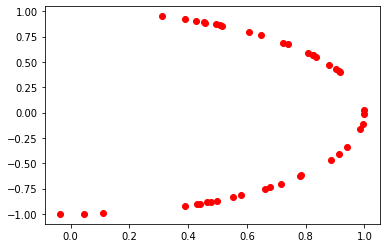

In [55]:
plt.plot(X.T[0], X.T[1], 'ro')
plt.show()

In [45]:
X

array([[ 0.51655035,  0.85625682],
       [ 0.11144135, -0.99377101],
       [ 0.45881   ,  0.8885344 ],
       [ 0.60818884,  0.79379238],
       [ 0.42732225,  0.90409938],
       [ 0.57974464, -0.81479823],
       [ 0.66137206, -0.75005799],
       [ 0.80923506,  0.587485  ],
       [ 0.94199536, -0.3356259 ],
       [ 0.49731153, -0.86757204],
       [ 0.88504832, -0.46549916],
       [ 0.8236965 ,  0.56703093],
       [ 0.99419186, -0.10762224],
       [ 0.678697  , -0.73441839],
       [ 0.91379247,  0.4061814 ],
       [ 0.91729981,  0.39819726],
       [ 0.64739582,  0.76215395],
       [-0.03613296, -0.99934699],
       [ 0.82341591,  0.56743831],
       [ 0.71430098, -0.69983864],
       [ 0.72428507,  0.68950064],
       [ 0.77893729, -0.62710182],
       [ 0.46374786, -0.88596723],
       [ 0.98641937, -0.16424625],
       [ 0.31097874,  0.95041687],
       [ 0.44082312, -0.89759399],
       [ 0.38900009,  0.92123772],
       [ 0.47831824, -0.87818658],
       [ 0.49396734,

In [52]:
X.T[1]

array([ 0.85625682, -0.99377101,  0.8885344 ,  0.79379238,  0.90409938,
       -0.81479823, -0.75005799,  0.587485  , -0.3356259 , -0.86757204,
       -0.46549916,  0.56703093, -0.10762224, -0.73441839,  0.4061814 ,
        0.39819726,  0.76215395, -0.99934699,  0.56743831, -0.69983864,
        0.68950064, -0.62710182, -0.88596723, -0.16424625,  0.95041687,
       -0.89759399,  0.92123772, -0.87818658,  0.86948046,  0.5477864 ,
        0.86099579, -0.40549879,  0.42729599, -0.92142273,  0.03053578,
       -0.83446133, -0.01832642, -0.99895858,  0.47328107,  0.89082097,
        0.67202467, -0.90256922, -0.62025868])